## Prediction of winning a match by player A or B.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
%matplotlib inline
pd.set_option('display.max_columns', 60)

In [2]:
# Load Data
df = pd.read_csv('ATP.csv')  

In [4]:
df.shape

(169690, 49)

In [5]:
df.describe()

,best_of,draw_size,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_ace,l_bpFaced,l_bpSaved,l_df,l_svpt,loser_age,loser_ht,loser_id,loser_rank,loser_rank_points,loser_seed,match_num,minutes,tourney_date,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_ace,w_bpFaced,w_bpSaved,w_df,w_svpt,winner_age,winner_ht,winner_id,winner_rank,winner_rank_points,winner_seed
count,169690.000000,1232.000000,83415.000000,83415.000000,83415.000000,83415.000000,83415.000000,83415.000000,83415.000000,83415.000000,83415.000000,164700.000000,139052.000000,169690.000000,145909.000000,93025.000000,32853.000000,169690.000000,82103.000000,1.696900e+05,83415.000000,83415.000000,83415.000000,83415.000000,83415.000000,83415.000000,83415.000000,83415.000000,83415.000000,167929.000000,150884.000000,169690.000000,149773.000000,94291.000000,65295.000000
mean,3.446072,75.022727,47.705149,31.683690,15.029119,12.159995,4.779776,8.751555,4.808044,3.509081,80.717904,25.661378,184.064918,102829.308574,120.815721,840.134727,7.589109,52.853492,100.786037,1.993052e+07,47.299514,35.659522,16.806102,12.354780,6.461823,5.174381,3.528790,2.743859,77.906887,25.612639,184.277200,102362.973540,81.409827,1342.313296,6.209495
std,0.832567,43.500071,19.359849,14.437267,7.266522,4.114587,4.625035,4.123616,3.271050,2.623945,29.485231,4.074386,6.624417,6072.998247,161.539365,940.800241,5.880047,81.992868,40.332392,1.396612e+05,19.191976,13.841457,7.026601,4.102224,5.297845,4.058311,3.081844,2.368677,29.532338,3.943494,6.632803,3958.369064,123.875156,1672.646568,5.401583
min,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,14.380000,160.000000,100001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.968012e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.360000,160.000000,100002.000000,1.000000,1.000000,1.000000
25%,3.000000,64.000000,34.000000,21.000000,10.000000,9.000000,2.000000,6.000000,2.000000,2.000000,59.000000,22.750000,180.000000,100529.000000,40.000000,367.000000,4.000000,9.000000,73.000000,1.981052e+07,33.000000,26.000000,12.000000,9.000000,3.000000,2.000000,1.000000,1.000000,56.000000,22.760000,180.000000,100445.000000,18.000000,496.000000,2.000000
50%,3.000000,64.000000,44.000000,29.000000,14.000000,11.000000,4.000000,8.000000,4.000000,3.000000,75.000000,25.320000,185.000000,101736.000000,77.000000,618.000000,6.000000,22.000000,94.000000,1.993021e+07,44.000000,33.000000,16.000000,11.000000,5.000000,4.000000,3.000000,2.000000,73.000000,25.250000,185.000000,101611.000000,48.000000,835.000000,5.000000
75%,3.000000,128.000000,58.000000,39.000000,19.000000,15.000000,7.000000,11.000000,7.000000,5.000000,96.000000,28.250000,188.000000,103821.000000,134.000000,985.000000,10.000000,45.000000,123.000000,2.005022e+07,57.000000,43.000000,21.000000,15.000000,9.000000,7.000000,5.000000,4.000000,94.000000,28.130000,188.000000,103694.000000,96.000000,1508.000000,8.000000
max,5.000000,128.000000,328.000000,284.000000,101.000000,91.000000,103.000000,35.000000,28.000000,26.000000,489.000000,63.690000,208.000000,208997.000000,2159.000000,16950.000000,35.000000,701.000000,1146.000000,2.019022e+07,361.000000,292.000000,82.000000,90.000000,113.000000,34.000000,24.000000,23.000000,491.000000,58.718686,208.000000,208996.000000,2101.000000,16950.000000,35.000000


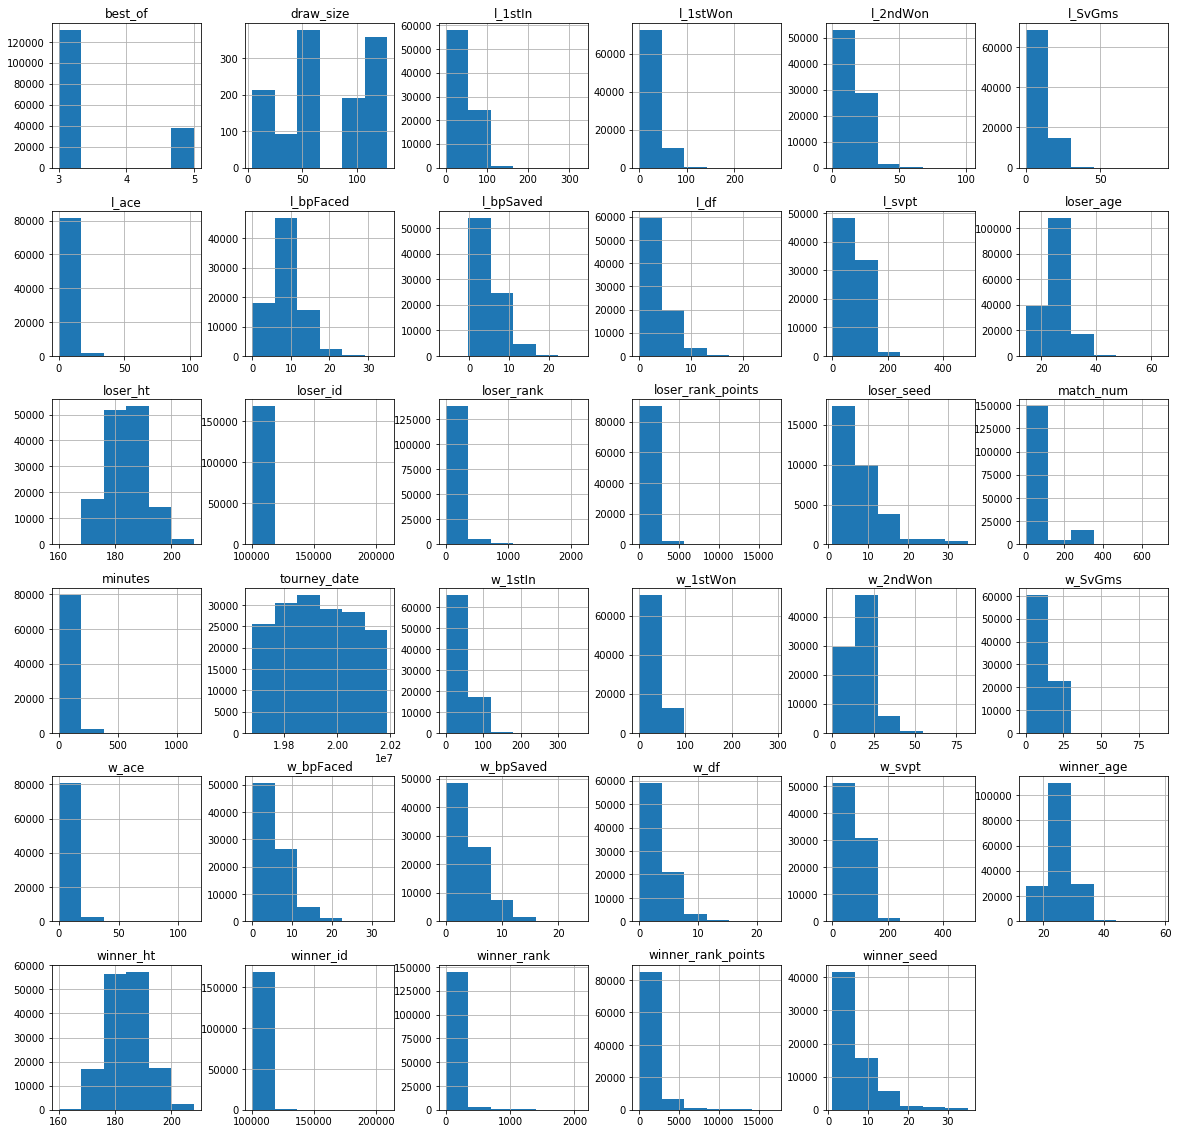

In [7]:
# See data distribution
df.hist(bins=6,figsize=(20,20))
plt.show()

In [8]:
# Check string data
np.sort(df['tourney_id'].unique())

array(['1968-303', '1968-314', '1968-319', ..., '2019-M001', '2019-M004',
       '2019-M020'], dtype=object)

In [9]:
# Check NAN value percentage
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing')[-10:]

,column_name,percent_missing
l_df,l_df,50.842713
l_svpt,l_svpt,50.842713
w_SvGms,w_SvGms,50.842713
l_1stWon,l_1stWon,50.842713
minutes,minutes,51.615888
winner_seed,winner_seed,61.521009
loser_seed,loser_seed,80.639401
loser_entry,loser_entry,85.067476
winner_entry,winner_entry,91.308857
draw_size,draw_size,99.273970


In [10]:
# Check to confirm 'which match belongs to who'
df.score[:10]

0    12-10 7-5 4-6 7-5
1          6-3 6-2 6-4
2      6-4 3-6 6-3 7-5
3          6-4 6-2 6-1
4          6-4 6-1 7-5
5          6-4 6-1 6-2
6      6-2 3-6 6-4 9-7
7          6-3 6-0 6-3
8     6-0 6-2 9-11 6-3
9          6-4 6-2 6-4
Name: score, dtype: object

In [12]:
# Create new dataframe with loser/winner columns replaced by each other.
df_wl = df
df_wl = pd.concat([df.iloc[:,0:2], df.iloc[:,30:49],df.iloc[:,21:30], df.iloc[:,2:21]],axis=1)
for i in df.columns:
    if i[:2] =='l_':
        df = df.rename(columns={i:  "A_"+i[2:]})
    elif i[:6] == 'loser_':
        df = df.rename(columns={i:  "A_"+i[6:]})
    elif i[:2] =='w_':
        df = df.rename(columns={i: "B_"+i[2:]})
    elif i[:7] == 'winner_':
        df = df.rename(columns={i:  "B_"+i[7:]})

for i in df_wl.columns:
    if i[:2] =='l_':
        df_wl = df_wl.rename(columns={i:  "B_"+i[2:]})
    elif i[:6] == 'loser_':
        df_wl = df_wl.rename(columns={i:  "B_"+i[6:]})
    elif i[:2] =='w_':
        df_wl = df_wl.rename(columns={i: "A_"+i[2:]})
    elif i[:7] == 'winner_':
        df_wl = df_wl.rename(columns={i:  "A_"+i[7:]})

In [13]:
# Create Target value: 0 for loser, 1 for winner
df_target = pd.DataFrame(np.zeros((df.shape[0],1)), columns=['Target'] )
df_wl_target = pd.DataFrame(np.ones((df.shape[0],1)), columns=['Target'] )

In [14]:
# Join two dataframe together
df = pd.concat([df, df_target], axis=1)
df_wl = pd.concat([df_wl, df_wl_target], axis=1)
df_all = pd.concat([df, df_wl], axis=0)

In [15]:
# df_all shuffled. 
df_all = df_all.sample(frac=1).reset_index(drop=True)

In [16]:
# Get number of set for each match
df_all['Num_set'] = df_all['score'].apply(lambda x:len(str(x).split(' ')))

In [17]:
# Get historical mean values for each player.
df_all_Amean = df_all[['A_1stIn', 'A_1stWon', 'A_2ndWon', 'A_SvGms', \
         'A_ace', 'A_bpFaced', 'A_bpSaved', 'A_df', 'A_svpt', \
       'minutes','Target', 'Num_set', 'A_id']].groupby('A_id').transform(lambda x:x.mean())

In [18]:
# Integrate new features to dataframe
for i in df_all_Amean:
    df_all_Amean = df_all_Amean.rename(columns={i: i+'_mean'})
df_all = pd.concat([df_all,df_all_Amean], axis=1)

In [19]:
# Drop feautres: draw_size droped because of its NAN rate.
df_all = df_all.drop(columns=['draw_size', 'A_name', 'B_name'])

In [20]:
# Encoding strings:
refcols=df_all.columns
for elt in refcols:
    if df_all[elt].dtype=='O':
        df_all[elt], _ = pd.factorize(df_all[elt])

In [21]:
# Fillna with mean
df_all = df_all.fillna(df_all.mean())

In [22]:
# Get values for ML target y
y = df_all['Target']
df_all = df_all.drop(columns=['Target'])

In [23]:
# Save list of columns names
li_columns = df.columns

In [24]:
# Normalization of features
x = df_all.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_all = pd.DataFrame(x_scaled)

In [25]:
# Train/Test dataset split
X_train, X_test, y_train, y_test = train_test_split(df_all, y, test_size=0.1, random_state=2)

In [62]:
# Choose Learning Methods:
# list of classifiers
names = [ "Decision Tree","Naive Bayes", "Random Forest", "AdaBoost", "Neural Net" ]
 
classifiers = [
    DecisionTreeClassifier(max_depth=5),
    GaussianNB(),
    RandomForestClassifier(n_estimators=20),
    AdaBoostClassifier(),
    MLPClassifier(alpha=0.1, max_iter=6000)
    ]

In [63]:
# train models and give accuracy and time information
start = time.time()
print('Model\t\t\t Score\t\t\t time(s)')
print('\n')
scores = []

for name, clf in zip(names, classifiers):
        print(name, end='')
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        print('\t\t', round(score*100, 1), '%', '\t\t', round(time.time() - start, 3))
        scores.append(score) 
        start = time.time()

Model			 Score			 time(s)


Decision Tree		 71.4 % 		 2.744
Naive Bayes		 68.8 % 		 0.357
Random Forest		 77.6 % 		 21.635
AdaBoost		 77.4 % 		 35.479
Neural Net		 81.2 % 		 84.356


**Apply Gridsearch + CV with the RandomForest & Neural Network method**

In [ ]:
# Choose classifier NN
nn=MLPClassifier()
# Choose param space
param_grid = { 
    'alpha': [0.1, 0.2],
    'max_iter': [4000, 8000]
}
# GridSearch + CV
CV_nn = GridSearchCV(estimator=nn, param_grid=param_grid, cv= 5)
CV_nn.fit(X_train, y_train)
# Get best_params
nn1=MLPClassifier(alpha=CV_nn.best_params_['alpha'], max_iter=CV_nn.best_params_['max_iter'])
nn1.fit(X_train, y_train)
pred=nn1.predict(X_test)
print("Accuracy for Neural Network on CV data: ", accuracy_score(y_test,pred))

In [ ]:
# Choose classifier RFC
rfc=RandomForestClassifier(random_state=50)
# Choose param space
param_grid = { 
    'n_estimators': [10, 50],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [5,6],
    'criterion' :['gini', 'entropy']
}
# GridSearch + CV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
# Get best_params
rfc1=RandomForestClassifier(random_state=50, max_features=CV_rfc.best_params_['max_features'], \
                            n_estimators=CV_rfc.best_params_['n_estimators'],\
                            max_depth=CV_rfc.best_params_['max_depth'], criterion=CV_rfc.best_params_['criterion'])
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ", accuracy_score(y_test,pred))

**Improvements**:
    - Preprocessing: 
        I) Add Column 'Number of Games' obtained from 'Score'
        II) Refine the mean value of ('1stin', ' 2ndWon', ...) by 'tourney_level'
        III) Improve Fillna method instead of using mean value
    - Dimension Reduction:
        I) Add Kbest step to select most correlated features
    - Model Selection:
        I)Try XGBoost package
        III) Try sequential model (e.g. LSTM) to take into consideration of evolution of a player
    - Result:
        I) Add vizualisation.
        II) Add Pipeline step.
        
**Timing**:
        - 0.5 hour to understand the vocabularies
        - 2.5 hours for preprocessing
        - 1 hour to choose learning model
        - 1.5 hour to train model
        - 0.5 hour to write comments/improvements